# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [8]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [12]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
#informacion general
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [3]:
# Informacion estadistica
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
#informacion sobre nulos
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

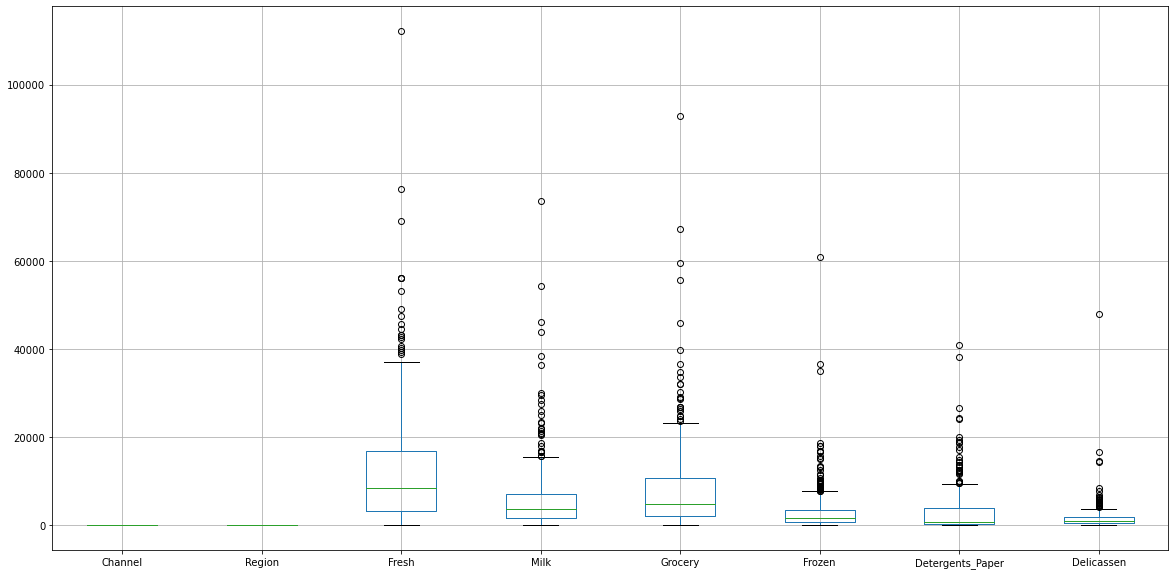

In [6]:
#visualizacion de outliers
plt.figure(figsize=(20,10))
customers.boxplot()

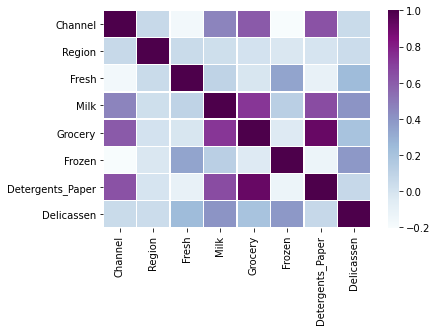

In [10]:
matrix = customers.corr()
sns.heatmap(matrix,linewidths=.4, cmap="BuPu")

In [ ]:
# Your observations here
# Todas las columnas son de tipo int y no contiene ningun dato nulo
# De los valores estadisticos podemos ver, hay un total 440 registros, todos los valores son positvos
# viendo el boxplot notamos que hay una cierta cantidad de outliers en cada columna 
# ademas los rangos de los valores entre cada columna son bastante distintos
# En la correlation, podemos notar que no hay correlaciones altas que superen el 90%

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

In [ ]:
# Despues de verificar los datos no encontre defectos destacados en la data que al limpiarlos mejoraran el perfomance de forma significativa en nuestro analisis
# El unico gran incoveniente que noto son los rangos de valores de los outliers, pero aun que un registro tenga un outlier en una categoria, en las demas categorias pueden tener valores promedios
# por este motivo decidi mantener los valores outliers y hacer la evaluacion del modelo con los datos sin modificar

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [19]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()
scaler.fit(customers)
customers_scale= pd.DataFrame(scaler.transform(customers))

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [20]:
from sklearn.cluster import KMeans

kmcustomers=KMeans(n_clusters=4).fit_predict(customers_scale)
customers['labels']=kmcustomers

In [21]:
customers['labels'].value_counts()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,1


Count the values in `labels`.

In [22]:
customers['labels'].value_counts()


2    209
1    126
0     92
3     13
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [23]:
# Your code here
from sklearn.cluster import DBSCAN 

dbscan_customers=DBSCAN(eps=0.5).fit_predict(customers_scale)
customers['labels_DBSCAN']=dbscan_customers

Count the values in `labels_DBSCAN`.

In [24]:
customers['labels_DBSCAN'].value_counts()


-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

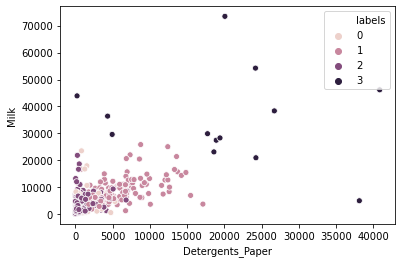

In [25]:
# Labels - Detergents_Paper and Milk
sns.scatterplot(customers['Detergents_Paper'], customers['Milk'], hue=customers['labels'])

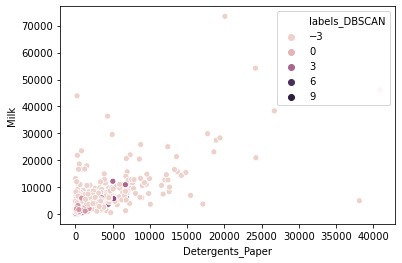

In [26]:
# labels_DBSCAN - Detergents_Paper and Milk
sns.scatterplot(customers['Detergents_Paper'], customers['Milk'], hue=customers['labels_DBSCAN'])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

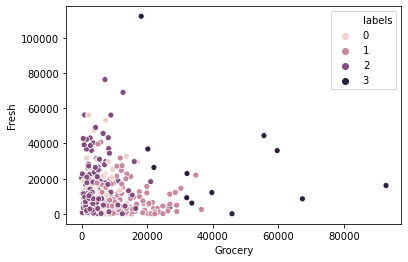

In [27]:
# labels - Grocery and Fresh
sns.scatterplot(customers['Grocery'], customers['Fresh'], hue=customers['labels'])

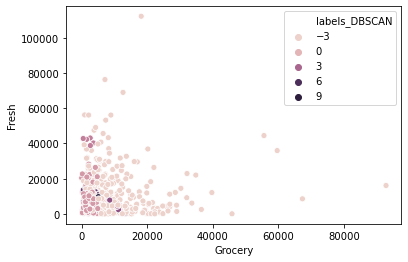

In [28]:
# labels_DBSCAN - Grocery and Fresh
sns.scatterplot(customers['Grocery'], customers['Fresh'], hue=customers['labels_DBSCAN'])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

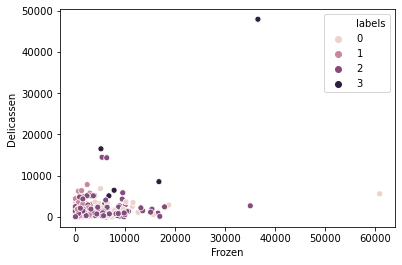

In [29]:
# labels - Frozen and Delicassen
sns.scatterplot(customers['Frozen'], customers['Delicassen'], hue=customers['labels'])

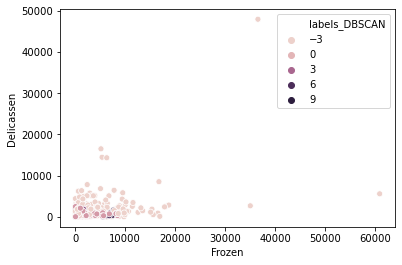

In [30]:
# labels_DBSCAN - Frozen and Delicassen
sns.scatterplot(customers['Frozen'], customers['Delicassen'], hue=customers['labels_DBSCAN'])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [36]:
customers.groupby('labels').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.054348,1.315217,12407.130435,3401.771739,4234.130435,4082.282609,864.739130,1198.402174,1.326087
1,2.000000,2.674603,8130.031746,8874.071429,14139.150794,1339.476190,6104.936508,1542.706349,-0.523810
2,1.000000,3.000000,13297.947368,3168.306220,3740.588517,3436.971292,769.392344,1262.511962,0.315789
3,1.846154,2.615385,25770.769231,35160.384615,41977.384615,6844.538462,19867.384615,7880.307692,-1.000000


In [37]:
customers.groupby('labels_DBSCAN').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.490196,2.45098,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,1.160784
0,2.000000,3.00000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,1.000000
1,1.000000,3.00000,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,2.000000
2,1.000000,3.00000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,2.000000
3,2.000000,3.00000,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,1.000000
4,2.000000,3.00000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,1.000000
5,1.000000,1.00000,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,0.000000
6,1.000000,1.00000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,0.000000
7,1.000000,2.00000,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,0.000000


Which algorithm appears to perform better?

In [ ]:
# Segun los promedios y las graficas, el algoritmo que tuvo mejor performance es kmeans
# en la grafica se podia observar que detectaba mejor los cluster segun el rango, lo mas evidente es que los valores outlier los colocaba en un cluster aparte
# a diferencia de DBSCAN que etiquetaba generalmente la mayoria de los valores con la etiqueta 0
# Viendo los promedio, kmeans tiene promedios con rangos de valores distintos, eso significa que intentaba tomar rangos de valores difernetes en cada cluster
# en cambio en DBSCAN como tenia mas cluster repetia muchos promedios, quiere decir que aveces tomaba rango de valores parecidos en varios cluster

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [44]:
# Con 2 cluster
kmcustomers=KMeans(n_clusters=2).fit_predict(customers_scale)
customers['labels']=kmcustomers

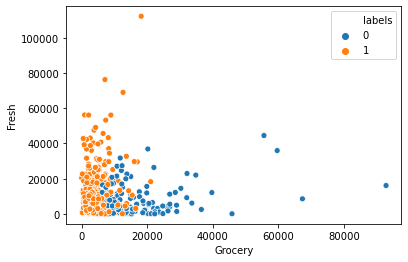

In [45]:
sns.scatterplot(customers['Grocery'], customers['Fresh'], hue=customers['labels'])

In [42]:
# Con 3 cluster
kmcustomers=KMeans(n_clusters=3).fit_predict(customers_scale)
customers['labels']=kmcustomers

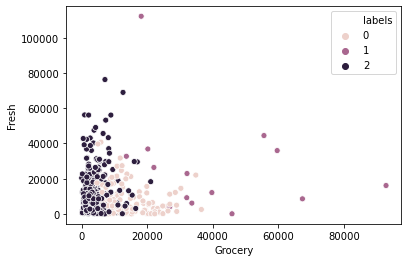

In [43]:
sns.scatterplot(customers['Grocery'], customers['Fresh'], hue=customers['labels'])

In [38]:
# Con 5 cluster
kmcustomers=KMeans(n_clusters=5).fit_predict(customers_scale)
customers['labels']=kmcustomers

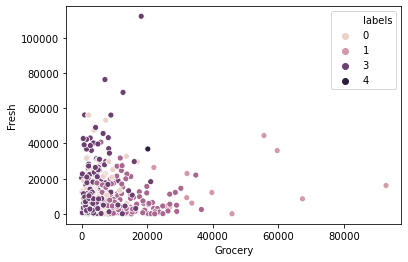

In [39]:
sns.scatterplot(customers['Grocery'], customers['Fresh'], hue=customers['labels'])

In [40]:
# Con 6 cluster
kmcustomers=KMeans(n_clusters=5).fit_predict(customers_scale)
customers['labels']=kmcustomers

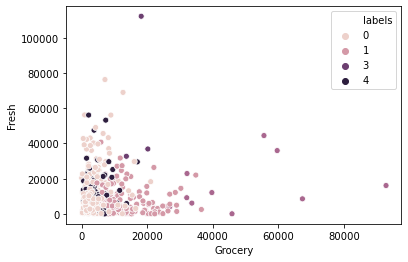

In [41]:
sns.scatterplot(customers['Grocery'], customers['Fresh'], hue=customers['labels'])

In [ ]:
# con estas pruebas, y con la grafica utilizada para visualizar los resultados
# puedo ver que kmeans agrupa de forma mas precisa cuando el numero de cluster disminuye, para este dataset

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [52]:
# con eps=0.2, min_samples=2
dbscan_customers=DBSCAN(eps=0.2, min_samples=2).fit_predict(customers_scale)
customers['labels_DBSCAN']=dbscan_customers

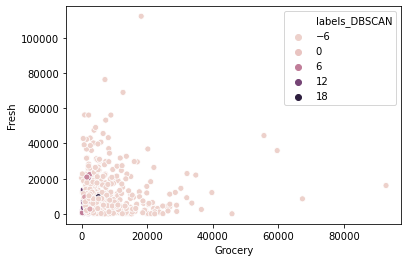

In [53]:
sns.scatterplot(customers['Grocery'], customers['Fresh'], hue=customers['labels_DBSCAN'])

In [48]:
# con (eps=0.4, min_samples=3
dbscan_customers=DBSCAN(eps=0.4, min_samples=3).fit_predict(customers_scale)
customers['labels_DBSCAN']=dbscan_customers

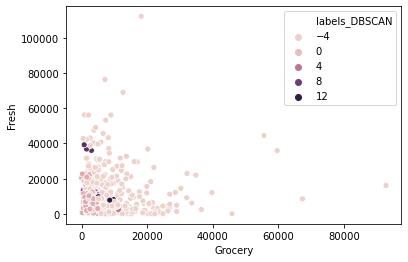

In [49]:
sns.scatterplot(customers['Grocery'], customers['Fresh'], hue=customers['labels_DBSCAN'])

In [50]:
# con eps=0.5, min_samples=5
dbscan_customers=DBSCAN(eps=0.5, min_samples=5).fit_predict(customers_scale)
customers['labels_DBSCAN']=dbscan_customers

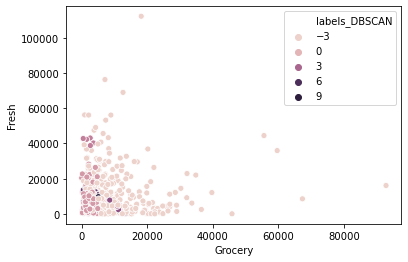

In [51]:
sns.scatterplot(customers['Grocery'], customers['Fresh'], hue=customers['labels_DBSCAN'])

In [70]:
# con eps=0.5, min_samples=8
dbscan_customers=DBSCAN(eps=0.5, min_samples=8).fit_predict(customers_scale)
customers['labels_DBSCAN']=dbscan_customers

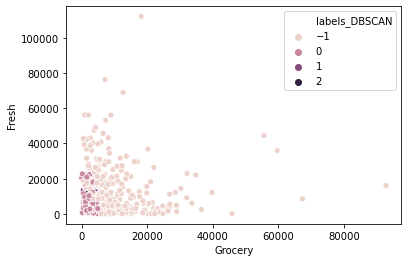

In [71]:
sns.scatterplot(customers['Grocery'], customers['Fresh'], hue=customers['labels_DBSCAN'])

In [ ]:
# Se nota una mejora del DBSCAN al momento de agrupar con cluster cuando se aumenta el valor de min_samples
# y se fija un buen limite para el eps